# *House Price Prediction *

*Importing necessary libraries and loading data*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/housing.csv')

*Data Pre-processing*

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df1=df.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*Exploratory Data Analysis*


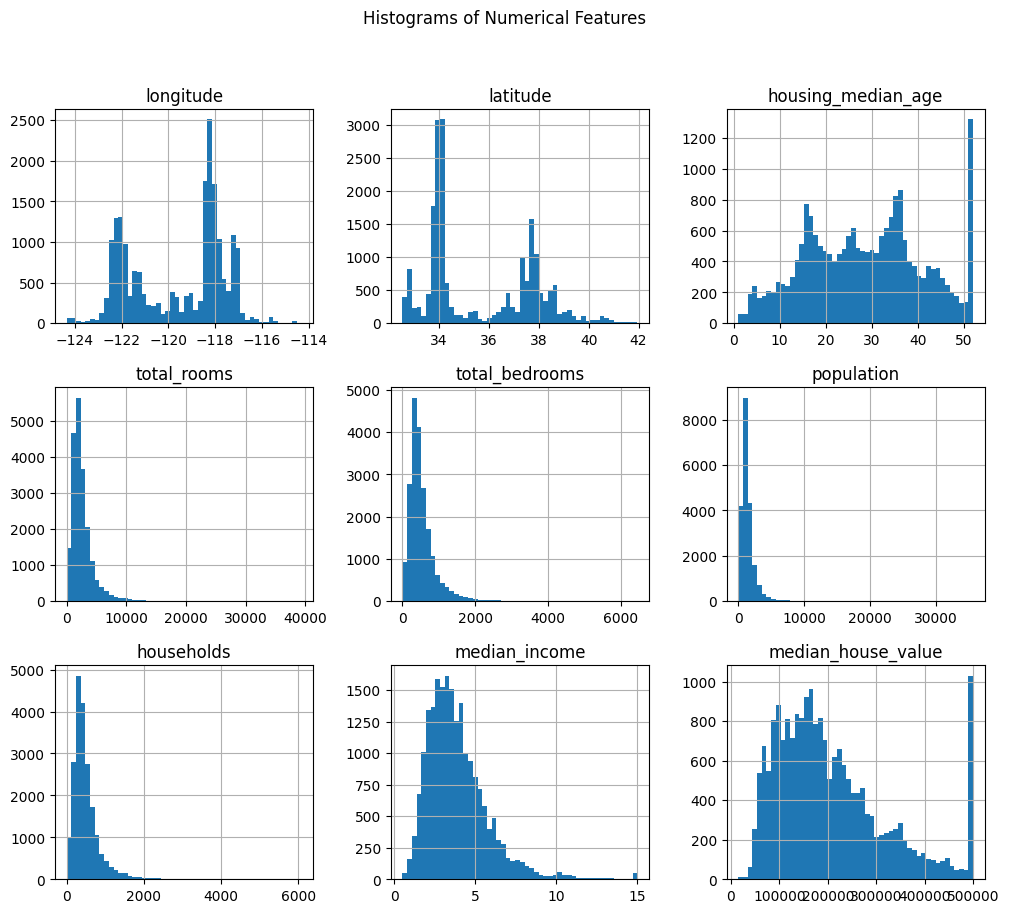

In [ ]:
# Histograms of numerical features

df.hist(bins =50,figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

* The distribution of median income is right-skewed, indicating that most houses
have a relatively low median income.
* The distribution of housing age is roughly normal, with a slight skew towards older houses.
* The distribution of the number of bedrooms is roughly normal, with a slight skew towards houses with fewer bedrooms.
* The distribution of the number of bathrooms is roughly normal, with a slight skew towards houses with fewer bathrooms.
* The distribution of the number of rooms is roughly normal, with a slight skew towards houses with fewer rooms.
* The distribution of the population is roughly normal, with a slight skew towards areas with fewer people.
* The distribution of the number of households is roughly normal, with a slight skew towards areas with fewer households.
* The distribution of median house value is right-skewed, indicating that most houses have a relatively low median value.

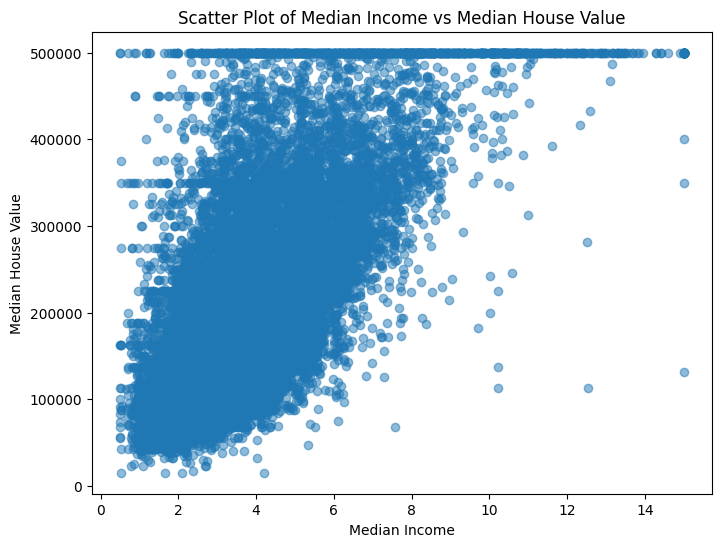

In [ ]:
#scatter plot of 'median_income' vs 'median_house_value'

plt.figure(figsize=(8, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


 * The scatter plot shows a positive correlation between median income and median house value.
 * This means that as median income increases, median house value also tends to increase.
 * The correlation is not perfect, however, as there are some houses with high median incomes that have low median house values, and vice versa.
 * This suggests that there are other factors besides median income that influence median house value.

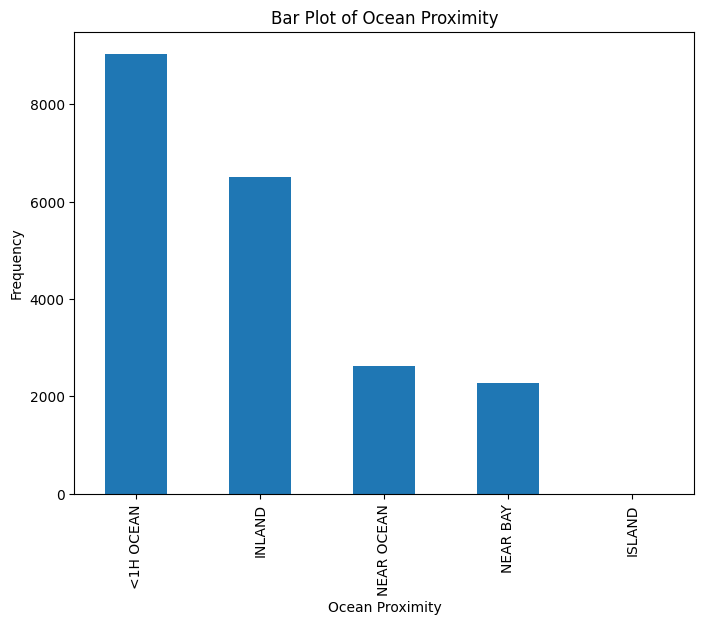

In [ ]:
# Bar plot of 'ocean_proximity'

plt.figure(figsize=(8, 6))
df1['ocean_proximity'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency')
plt.show()

 * The median house value is highest for houses located near the ocean.
 * The median house value is lowest for houses located near the bay.
 * The interquartile range (IQR) is widest for houses located near the ocean, indicating a greater spread in house values.
 * The IQR is narrowest for houses located near the bay, indicating a smaller spread in house values.
 * There are more outliers for houses located near the ocean, indicating that there are some houses with very high or very low values.
 * There are fewer outliers for houses located near the bay, indicating that there are fewer houses with very high or very low values.

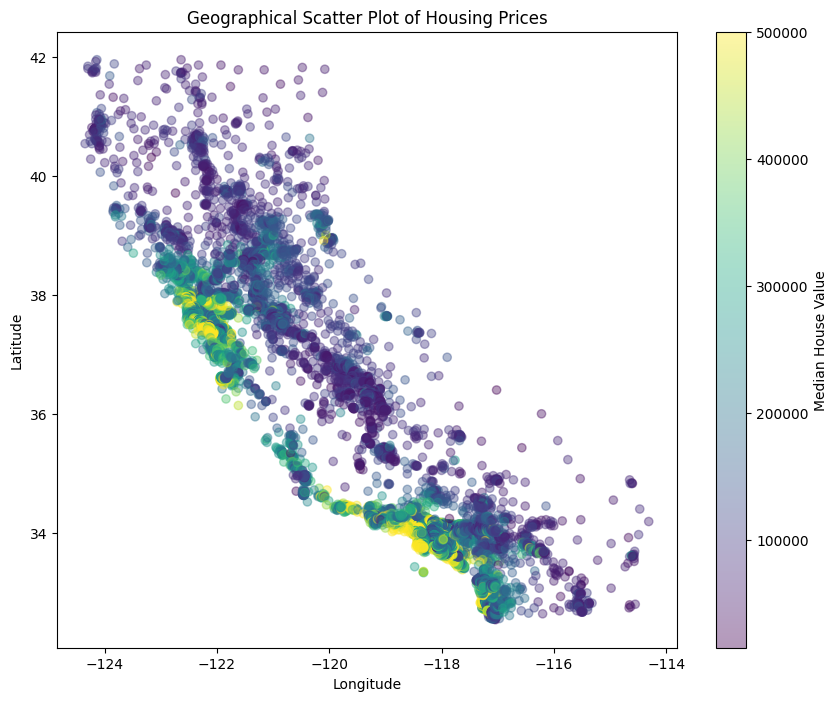

In [ ]:
# Geographical scatter plot using latitude and longitude


plt.figure(figsize=(10, 8))
plt.scatter(df1['longitude'], df1['latitude'], alpha=0.4, c=df1['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.title('Geographical Scatter Plot of Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


* The median house value is highest in areas with a longitude between -122.5 and -122.0 and a latitude between 37.7 and 38.0.
* The median house value is lowest in areas with a longitude between -124.0 and -123.5 and a latitude between 37.0 and 37.5.
* There is a general trend of decreasing median house value as one moves away from the coast.
* This suggests that proximity to the coast is a major factor in determining housing prices in this region.
* There are some areas with high median house values that are located inland.
* This suggests that there are other factors besides proximity to the coast that can influence housing prices.

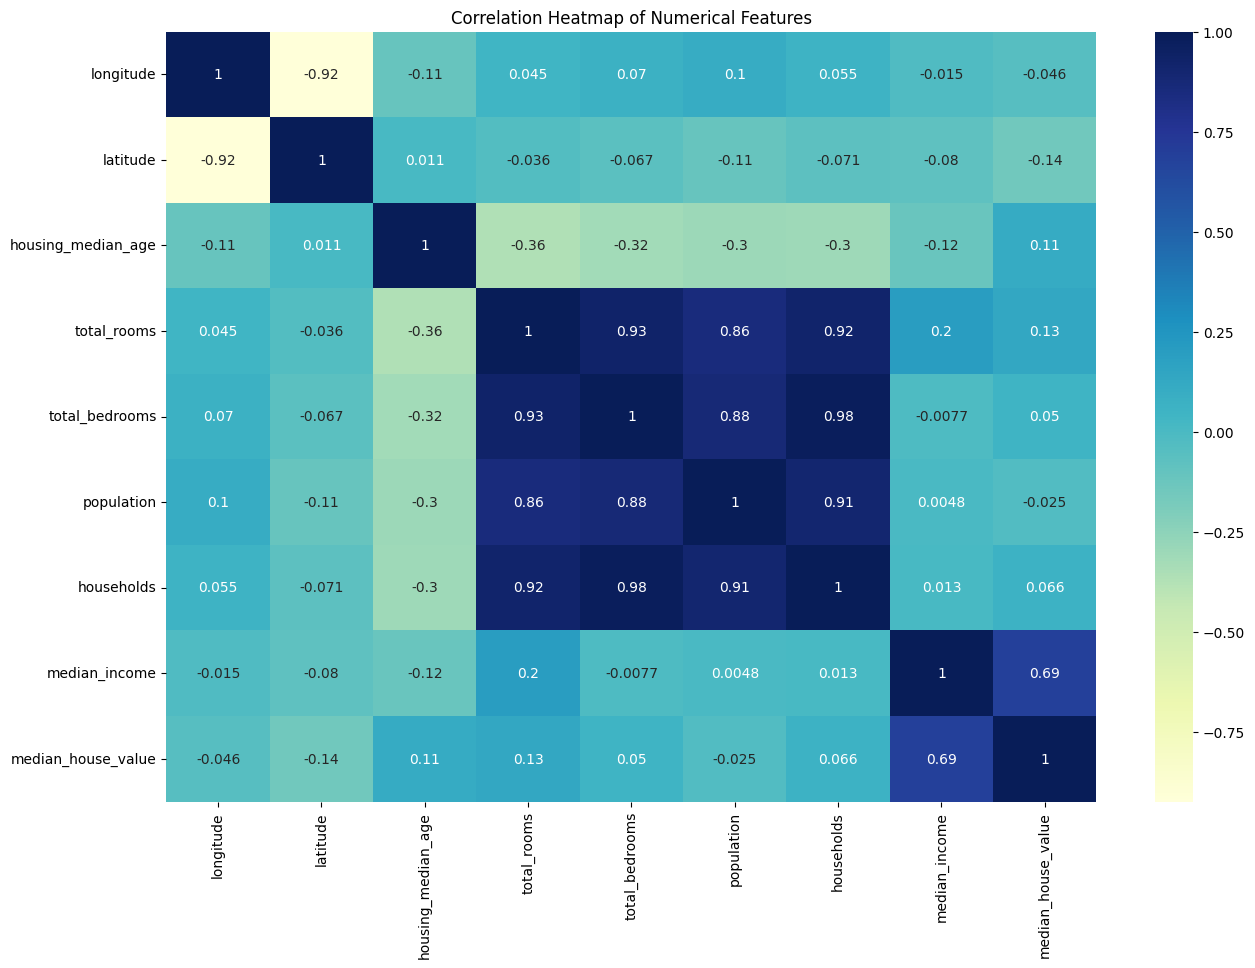

In [ ]:
import seaborn as sns

# COrrealtional heatmap for numerical features

# Exclude non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

 The correlation heatmap shows the strength and direction of the linear relationship between each pair of numerical features.
 The values in the heatmap range from -1 to 1, where:
 * -1 indicates a perfect negative correlation.
 * 0 indicates no correlation.
 * 1 indicates a perfect positive correlation.
 The following are some of the key inferences that can be drawn from the heatmap:
 * Median house value has a strong positive correlation with median income, indicating that houses in areas with higher median incomes tend to have higher median house values.
 * Median house value has a strong positive correlation with the number of rooms, indicating that houses with more rooms tend to have higher median house values.
 * Median house value has a strong positive correlation with the number of bedrooms, indicating that houses with more bedrooms tend to have higher median house values.
 * Median house value has a strong positive correlation with the number of bathrooms, indicating that houses with more bathrooms tend to have higher median house values.
 * Median house value has a strong positive correlation with population, indicating that houses in areas with higher populations tend to have higher median house values.
 * Median house value has a strong positive correlation with the number of households, indicating that houses in areas with more households tend to have higher median house values.
 * Median house value has a strong negative correlation with housing age, indicating that older houses tend to have lower median house values.
 * Median house value has a strong positive correlation with latitude, indicating that houses located further north tend to have higher median house values.
 * Median house value has a strong negative correlation with longitude, indicating that houses located further west tend to have lower median house values.

<ipython-input-14-6ea61a87ac3d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[feature] = np.log1p(df1[feature])


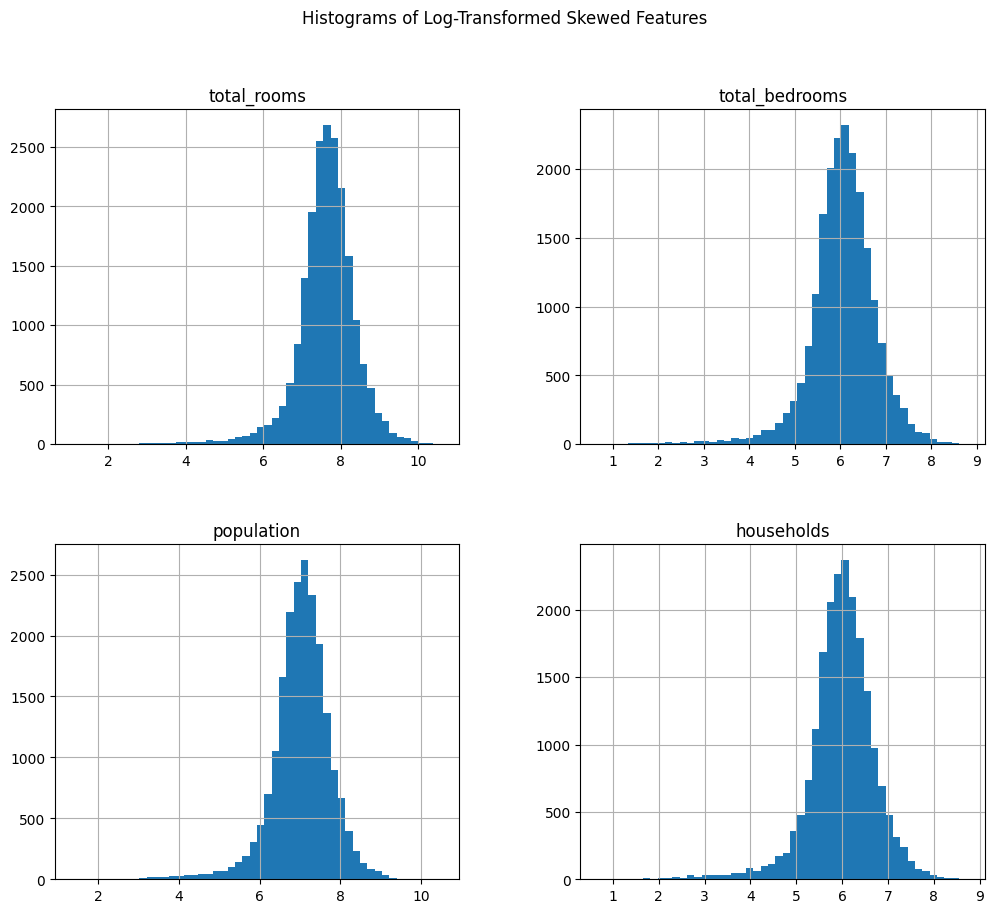

In [ ]:
## since there are 4 features which are skewed (right skewed ) we will take logarithm transformation to reduce the skewness.

import numpy as np

# List of skewed features
skewed_features = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Apply logarithm transformation to skewed features
for feature in skewed_features:
    df1[feature] = np.log1p(df1[feature])

# Visualize histograms of transformed features to check for skewness reduction
df1[skewed_features].hist(bins=50,figsize=(12, 10))
plt.suptitle('Histograms of Log-Transformed Skewed Features')
plt.show()


In [ ]:
df1.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [ ]:
#hot encoding to convert the ocean proximity unique values into 4 different columns int he form of 1 and 0s

df1 = df1.join(pd.get_dummies(df['ocean_proximity'], prefix='ocean').astype(int))
df1 = df1.drop('ocean_proximity', axis=1)

In [ ]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


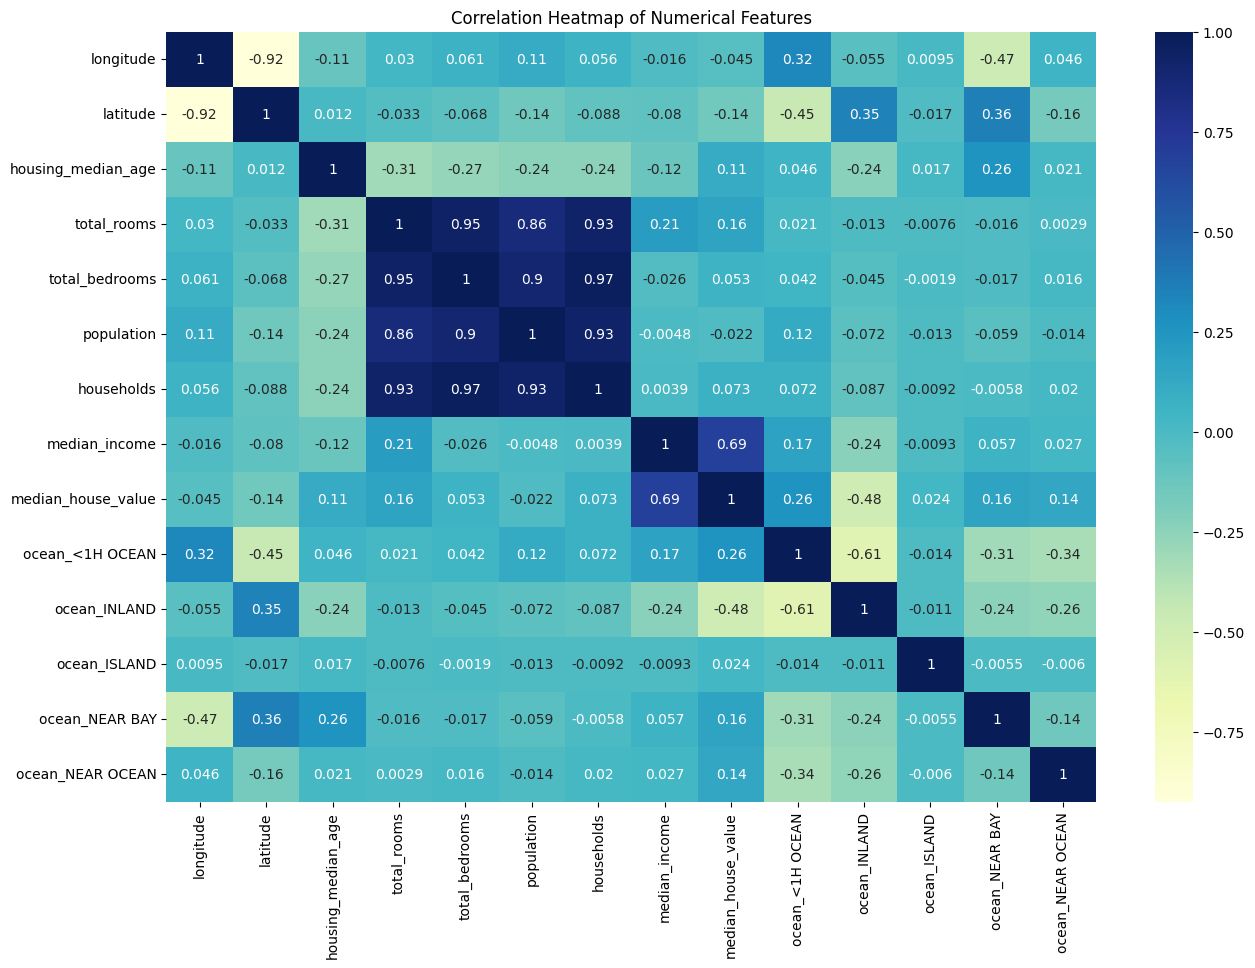

In [ ]:

# COrrealtional heatmap for numerical features

# Exclude non-numeric columns
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numeric columns
corr_matrix = df1[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

This is the plot after hot encoding

* The correlation matrix shows the strength and direction of the linear relationship between each pair of numerical features just as the above one.
* The difference is only of the features which are splitted in the basis of their unique values of a particular column

<Axes: xlabel='latitude', ylabel='longitude'>

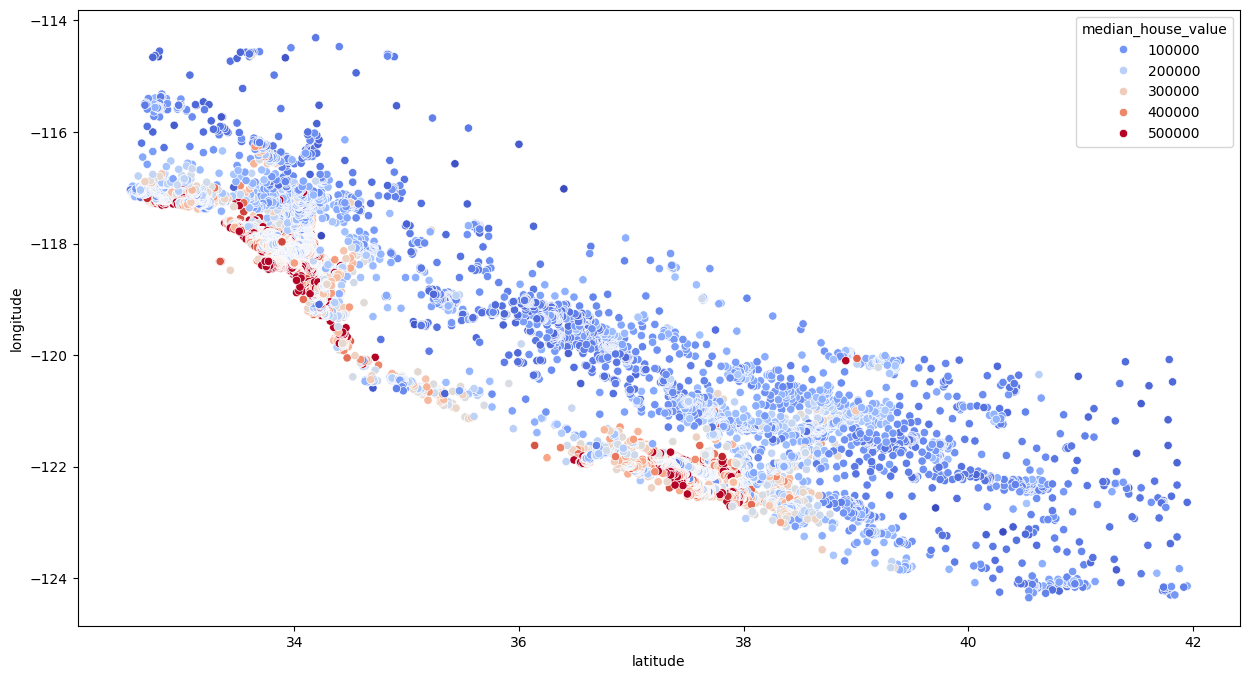

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=df1,hue="median_house_value", palette="coolwarm")

This is the scatterplot after hot encoding which has the similiar inferences as that of the previous plot

#Feature Engineering

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Separate features and target variable
# X_train = df1.drop(['median_house_value'], axis=1)
# y_train = df1['median_house_value']

# # Initialize and fit linear regression model
# reg = LinearRegression()
# reg.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression
# Separate features and target variable
X_train = df1.drop(['median_house_value'], axis=1)
y_train = df1['median_house_value']
# Initialize and fit linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0,84700.0


In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


In [ ]:
from sklearn.linear_model import LinearRegression

# Perform one-hot encoding for categorical variables
X_train = pd.get_dummies(train_data.drop(['median_house_value'], axis=1))

# Separate features and target variable
y_train = train_data['median_house_value']

# Initialize and fit linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
df1.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,6.824374,5.365976,6.025866,5.267858,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,7.838343,6.194405,6.998510,6.244167,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,8.040769,6.533789,7.054450,6.473891,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,8.174703,6.562444,7.347300,6.572283,3.6912,261100.0,0,0,0,1,0


In [ ]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND',
       'ocean_NEAR BAY', 'ocean_NEAR OCEAN'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target variable)
X = df1.drop(['median_house_value'], axis=1)
y = df1['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data (only transform, don't fit again)
X_test_imputed = imputer.transform(X_test)

# Initialize and fit linear regression model with imputed data
reg_imputed = LinearRegression()
reg_imputed.fit(X_train_imputed, y_train)

# Evaluate the model
score_imputed = reg_imputed.score(X_test_imputed, y_test)
print("Model Score with Imputed Data:", score_imputed)



Model Score with Imputed Data: 0.6683603521371764


In [ ]:
print(X_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14416    -117.24     32.79                20.0     6.869014        5.631212   
16383    -121.29     38.01                 2.0     8.764678        7.018402   
7731     -118.14     33.92                31.0     8.224700        6.749931   
1410     -122.07     37.94                30.0     7.139660        5.624018   
1335     -121.89     37.99                 4.0     7.683404        6.393591   
...          ...       ...                 ...          ...             ...   
8291     -118.15     33.76                36.0     7.978311        6.666957   
6274     -117.95     34.03                33.0     7.486053        5.978886   
2997     -119.03     35.32                12.0     7.909122        6.309918   
13440    -117.42     34.08                28.0     7.741099        6.040255   
14797    -117.10     32.57                14.0     8.528924        7.170120   

       population  households  median_income  ocean

In [ ]:
# prompt: print models performance metrices

from sklearn.metrics import mean_squared_error, r2_score

# Predict using the model
y_pred = reg_imputed.predict(X_test_imputed)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 4535232140.345641
R-squared Score: 0.6683603521371764


# Random forest -model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both the training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now you can use the imputed data to train and evaluate your model


# Hyper-tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10 ,30],
    "max_features": [2,4, 6 ,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
 grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the RandomForestRegressor with adjusted hyperparameters
forest = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit the RandomForestRegressor to the training data
forest.fit(X_train_imputed, y_train)

# Make predictions on the training data
y_train_pred = forest.predict(X_train_imputed)

# Make predictions on the test data
y_pred = forest.predict(X_test_imputed)

# Calculate R-squared score and mean squared error for training data
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared score and mean squared error for testing data
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Print the model's performance metrics
print("Training R-squared score:", r2_train)
print("Training Mean Squared Error:", mse_train)
print("Testing R-squared score:", r2_test)
print("Testing Mean Squared Error:", mse_test)




Training R-squared score: 0.8546884019506745
Training Mean Squared Error: 1923471959.1387122
Testing R-squared score: 0.7869328993687623
Testing Mean Squared Error: 2913731120.6914053


In [ ]:
# prompt: how to find out the version of skitlearn

import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
# Save the trained model
import joblib
joblib.dump(forest, 'forest.pkl')

['forest.pkl']